In [85]:
# use networkX, seems to be pretty robust, read in original files
# https://networkx.org/documentation/stable/reference/index.html
import numpy as np
import networkx as nx
graphs = []
graphs.append(nx.Graph())
graphs.append(nx.Graph())
graphs.append(nx.Graph())
def read(txtfile, loc):
  with open(txtfile, 'r') as file:
    # Skip the header lines
    next(file)
    next(file)
    next(file)
    next(file)

    # Process the rest of the lines
    for line in file:
        if line.strip():  # Skip empty lines
            if not line.startswith("#"):  # Skip comment lines
                node1, node2 = map(int, line.strip().split())  # Assuming integers for node IDs
                loc.add_edge(node1, node2)
read('astrophysics.txt', graphs[0])
read('condensedmatter.txt', graphs[1])
read('generalrelativity.txt', graphs[2])

In [7]:
# function returns the "two step" neighborhood size, which is the set of unique nodes that are at most 2 edges away from node in graph G
def twoHop(G, node):
    twoAdj = []
    for n in list(dict(G.adj[node]).keys()):
        # add all direct neighbors
        twoAdj.append(n)
        # add all neighbors of neighbors
        twoAdj.extend(list(dict(G.adj[n]).keys()))
    #remove duplicates
    np2Adj = np.unique(np.asarray(twoAdj))
    #subtract one because self is counted
    return np2Adj.size - 1

In [82]:
# function that removes top n degrees from a graph, returns new graph
def removeN(G, n):
    newGraph = G.copy()
    def toSort(x):
        return x[1]
    degrees = dict(G.degree())
    sortDeg = sorted(degrees.items(), key = toSort, reverse = True)
    topN = [pair[0] for pair in sortDeg[:n]]
    newGraph.remove_nodes_from(topN)
    return newGraph

In [55]:
# code to initialize centrality tables
degs = []
closeness = []
betweenness = []
twoDegs = []
#import matplotlib.pyplot as plt
#for k in range(3):
#  degs.append(np.array(list(dict(graphs[k].degree()).values())))
#  closeness.append(np.array(list(dict(nx.closeness_centrality(graphs[k])).values())))
#  betweenness.append(np.array(list(dict(nx.betweenness_centrality(graphs[k])).values())))
#  curr2Deg = []
#  for i in list(graphs[k].nodes()):
#        curr2Deg.append(twoHop(graphs[k], i))
#  twoDegs.append(curr2Deg)

In [57]:
# hard loading saved arrays because functions take too long to run
degs.append(np.load('apDegs.npy'))
degs.append(np.load('cmDegs.npy'))
degs.append(np.load('grDegs.npy'))
closeness.append(np.load('apClose.npy'))
closeness.append(np.load('cmClose.npy'))
closeness.append(np.load('grClose.npy'))
betweenness.append(np.load('apTween.npy'))
betweenness.append(np.load('cmTween.npy'))
betweenness.append(np.load('grTween.npy'))
twoDegs.append(np.load('aptwoDegs.npy'))
twoDegs.append(np.load('cmtwoDegs.npy'))
twoDegs.append(np.load('grtwoDegs.npy'))

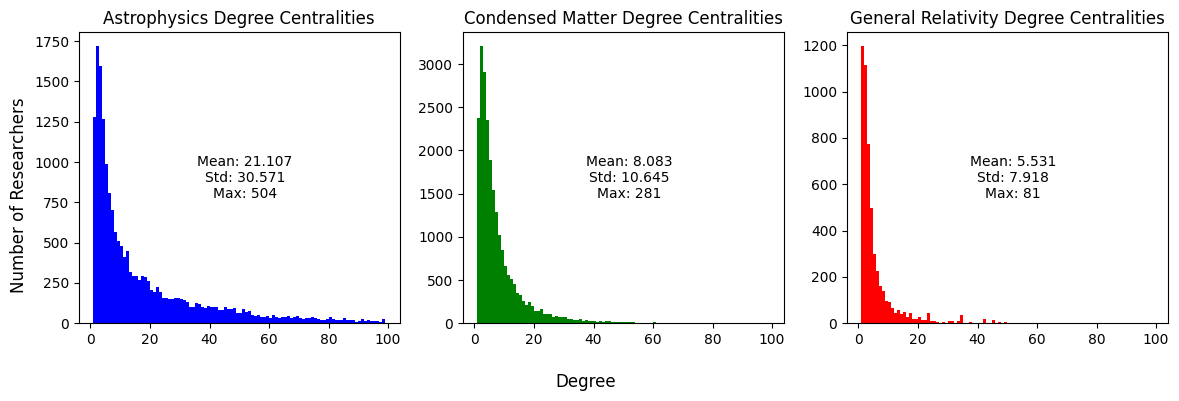

In [10]:
# plot degree centralities
import matplotlib.pyplot as plt
fig, deg = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
deg[0].hist(degs[0], bins=np.arange(1,100), color='blue')
deg[0].set_title('Astrophysics Degree Centralities')
deg[0].text(deg[0].get_xlim()[1]/2, deg[0].get_ylim()[1]/2, 
            'Mean: ' + str(round(degs[0].mean(), 3)) + '\n'  + 'Std: ' + str(round(degs[0].std(),3)) + '\n' + 'Max: ' + str(degs[0].max()), 
            ha = 'center', va = 'center')

deg[1].hist(degs[1], bins=np.arange(1,100), color='green')
deg[1].set_title('Condensed Matter Degree Centralities')
deg[1].text(deg[1].get_xlim()[1]/2, deg[1].get_ylim()[1]/2, 
            'Mean: ' + str(round(degs[1].mean(), 3)) + '\n'  + 'Std: ' + str(round(degs[1].std(),3)) + '\n' + 'Max: ' + str(degs[1].max()), 
            ha = 'center', va = 'center')

deg[2].hist(degs[2], bins=np.arange(1,100), color='red')
deg[2].set_title('General Relativity Degree Centralities')
deg[2].text(deg[2].get_xlim()[1]/2, deg[2].get_ylim()[1]/2, 
            'Mean: ' + str(round(degs[2].mean(), 3)) + '\n'  + 'Std: ' + str(round(degs[2].std(),3)) + '\n' + 'Max: ' + str(degs[2].max()), 
            ha = 'center', va = 'center')
fig.supxlabel('Degree')
fig.supylabel('Number of Researchers')
# Display the plot
plt.tight_layout()
plt.show()

In [166]:
# comparing metrics across through centralization scores but also just normalized degree
def centralization(arr):
    return np.sum(np.max(arr)-arr)/(arr.size-1)/(arr.size-2)
degCen = []
cloCen = []
betCen = []
for i in range(3):
    degCen.append(centralization(degs[i]))
    cloCen.append(centralization(degs[i]))
    betCen.append(centralization(degs[i]))
print(degCen)
print(cloCen)
print(betCen)

[0.025728223636552455, 0.011799246363289878, 0.014405283648741354]
[0.025728223636552455, 0.011799246363289878, 0.014405283648741354]
[0.025728223636552455, 0.011799246363289878, 0.014405283648741354]


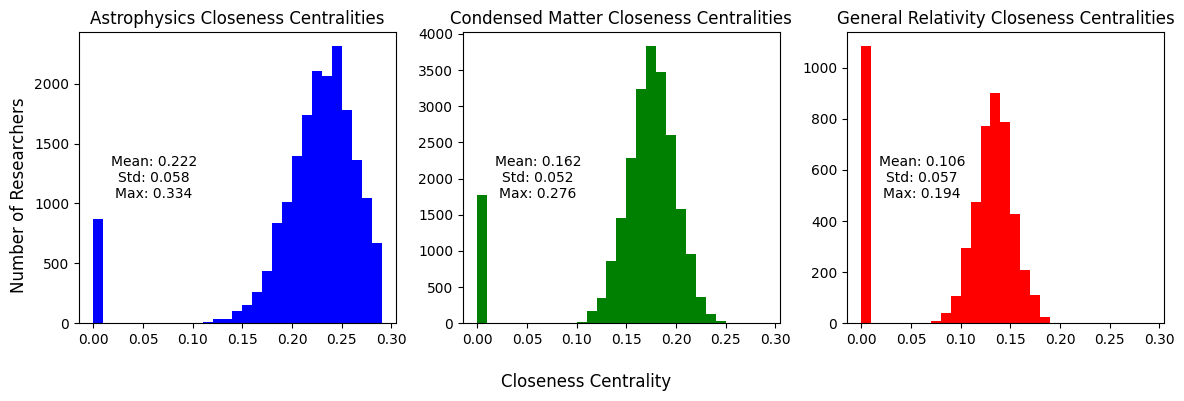

In [11]:
# plot closeness centralities
import matplotlib.pyplot as plt
fig, close = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
close[0].hist(closeness[0], bins = np.arange(0, .3, .01), color='blue')
close[0].set_title('Astrophysics Closeness Centralities')
close[0].text(close[0].get_xlim()[1]/5, close[0].get_ylim()[1]/2, 
            'Mean: ' + str(round(closeness[0].mean(), 3)) + '\n'  + 'Std: ' + str(round(closeness[0].std(),3)) + '\n' + 'Max: ' + str(round(closeness[0].max(),3)), 
            ha = 'center', va = 'center')

close[1].hist(closeness[1], bins = np.arange(0, .3, .01), color='green')
close[1].set_title('Condensed Matter Closeness Centralities')
close[1].text(close[1].get_xlim()[1]/5, close[1].get_ylim()[1]/2, 
            'Mean: ' + str(round(closeness[1].mean(), 3)) + '\n'  + 'Std: ' + str(round(closeness[1].std(),3)) + '\n' + 'Max: ' + str(round(closeness[1].max(),3)), 
            ha = 'center', va = 'center')

close[2].hist(closeness[2], bins = np.arange(0, .3, .01), color='red')
close[2].set_title('General Relativity Closeness Centralities')
close[2].text(close[2].get_xlim()[1]/5, close[2].get_ylim()[1]/2, 
            'Mean: ' + str(round(closeness[2].mean(), 3)) + '\n'  + 'Std: ' + str(round(closeness[2].std(),3)) + '\n' + 'Max: ' + str(round(closeness[2].max(),3)), 
            ha = 'center', va = 'center')
fig.supxlabel('Closeness Centrality')
fig.supylabel('Number of Researchers')
# Display the plot
plt.tight_layout()
plt.show()

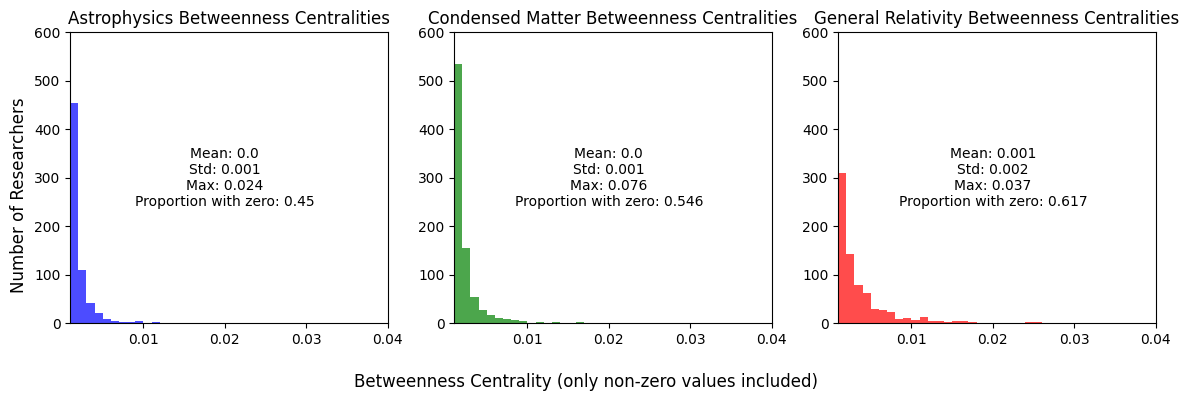

In [21]:
# plot betweenness centralities
import matplotlib.pyplot as plt
fig, twn = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
twn[0].hist(betweenness[0], np.arange(0, .04, .001), color='blue', alpha=0.7)
twn[0].set_title('Astrophysics Betweenness Centralities')
twn[0].set_xlim(.001,.04)
twn[0].set_ylim(0,600)
twn[0].text(twn[0].get_xlim()[1]/2, twn[0].get_ylim()[1]/2, 
            'Mean: ' + str(round(betweenness[0].mean(), 3)) + '\n'  + 'Std: ' + str(round(betweenness[0].std(),3)) + '\n' + 'Max: ' + str(round(betweenness[0].max(),3))
            +'\n' + 'Proportion with zero: ' + str(round(np.sum(betweenness[0] == 0)/betweenness[0].size,3)), 
            ha = 'center', va = 'center')

twn[1].hist(betweenness[1], np.arange(0, .04, .001), color='green', alpha=0.7)
twn[1].set_title('Condensed Matter Betweenness Centralities')
twn[1].set_xlim(.001,.04)
twn[1].set_ylim(0,600)
twn[1].text(twn[1].get_xlim()[1]/2, twn[1].get_ylim()[1]/2, 
            'Mean: ' + str(round(betweenness[1].mean(), 3)) + '\n'  + 'Std: ' + str(round(betweenness[1].std(),3)) + '\n' + 'Max: ' + str(round(betweenness[1].max(),3))
            +'\n' + 'Proportion with zero: ' + str(round(np.sum(betweenness[1] == 0)/betweenness[1].size,3)), 
            ha = 'center', va = 'center')

twn[2].hist(betweenness[2], np.arange(0, .04, .001), color='red', alpha=0.7)
twn[2].set_title('General Relativity Betweenness Centralities')
twn[2].set_xlim(.001,.04)
twn[2].set_ylim(0,600)
twn[2].text(twn[2].get_xlim()[1]/2, twn[2].get_ylim()[1]/2, 
            'Mean: ' + str(round(betweenness[2].mean(), 3)) + '\n'  + 'Std: ' + str(round(betweenness[2].std(),3)) + '\n' + 'Max: ' + str(round(betweenness[2].max(),3))
            +'\n' + 'Proportion with zero: ' + str(round(np.sum(betweenness[2] == 0)/betweenness[2].size,3)), 
            ha = 'center', va = 'center')
fig.supxlabel('Betweenness Centrality (only non-zero values included)')
fig.supylabel('Number of Researchers')
# Display the plot
plt.tight_layout()
plt.show()

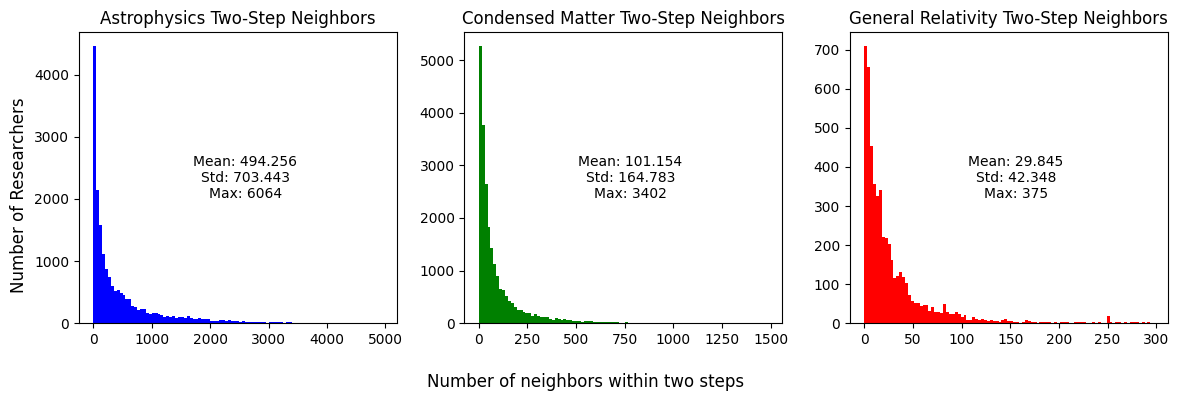

In [12]:
# plot two-step neighbors histogram
import matplotlib.pyplot as plt
fig, twoDeg = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
twoDeg[0].hist(twoDegs[0], color='blue', bins = np.arange(0,5000,50))
twoDeg[0].set_title('Astrophysics Two-Step Neighbors')
twoDeg[0].text(twoDeg[0].get_xlim()[1]/2, twoDeg[0].get_ylim()[1]/2, 
            'Mean: ' + str(round(twoDegs[0].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[0].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[0].max(),3)), 
            ha = 'center', va = 'center')

twoDeg[1].hist(twoDegs[1], color='green', bins = np.arange(0, 1500, 15))
twoDeg[1].set_title('Condensed Matter Two-Step Neighbors')
twoDeg[1].text(twoDeg[1].get_xlim()[1]/2, twoDeg[1].get_ylim()[1]/2, 
            'Mean: ' + str(round(twoDegs[1].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[1].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[1].max(),3)), 
            ha = 'center', va = 'center')

twoDeg[2].hist(twoDegs[2], color='red', bins = np.arange(0, 300, 3))
twoDeg[2].set_title('General Relativity Two-Step Neighbors')
twoDeg[2].text(twoDeg[2].get_xlim()[1]/2, twoDeg[2].get_ylim()[1]/2, 
            'Mean: ' + str(round(twoDegs[2].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[2].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[2].max(),3)), 
            ha = 'center', va = 'center')
fig.supxlabel('Number of neighbors within two steps')
fig.supylabel('Number of Researchers')
# Display the plot
plt.tight_layout()
plt.show()

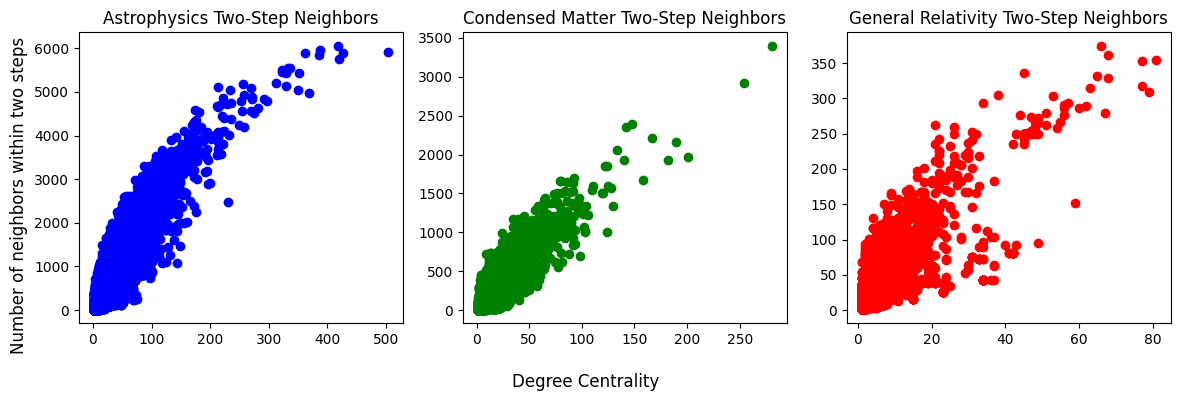

In [290]:
# plot two-step neighbors on y, one-step/neighbors on x
import matplotlib.pyplot as plt
fig, degDeg = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
degDeg[0].scatter(degs[0], twoDegs[0], color = 'blue')
degDeg[0].set_title('Astrophysics Two-Step Neighbors')

degDeg[1].scatter(degs[1], twoDegs[1], color = 'green')
degDeg[1].set_title('Condensed Matter Two-Step Neighbors')

degDeg[2].scatter(degs[2], twoDegs[2], color = 'red')
degDeg[2].set_title('General Relativity Two-Step Neighbors')
fig.supxlabel('Degree Centrality')
fig.supylabel('Number of neighbors within two steps')
# Display the plot
plt.tight_layout()
plt.show()

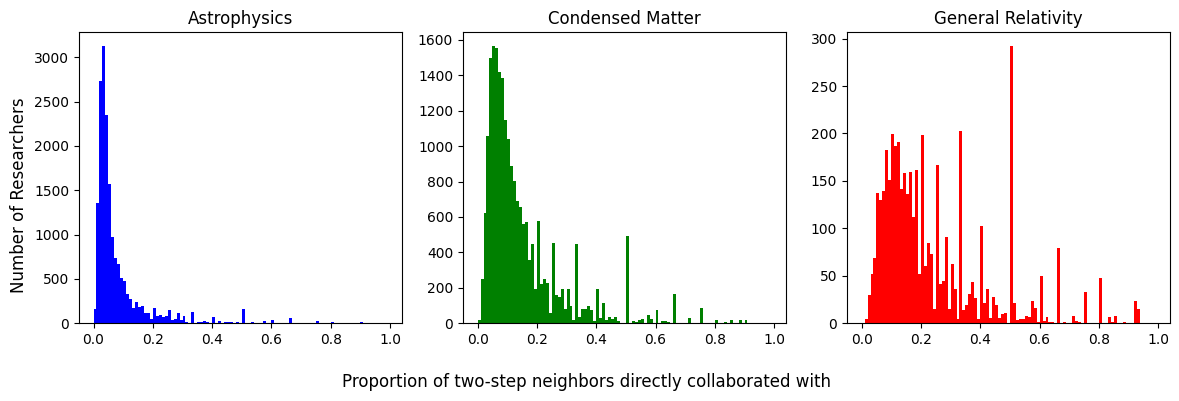

In [13]:
# plot two-step neighbors directly collaborated with
import matplotlib.pyplot as plt
fig, twoDeg = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
twoDeg[0].hist(degs[0]/(np.maximum(twoDegs[0],1)), color='blue', bins = np.arange(0, 1, .01))
twoDeg[0].set_title('Astrophysics')
#twoDeg[0].text(twoDeg[0].get_xlim()[1]/2, twoDeg[0].get_ylim()[1]/2, 
            #'Mean: ' + str(round(twoDegs[0].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[0].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[0].max(),3)), 
            #ha = 'center', va = 'center')

twoDeg[1].hist(degs[1]/(np.maximum(twoDegs[1],1)), color='green', bins = np.arange(0, 1, .01))
twoDeg[1].set_title('Condensed Matter')
#twoDeg[1].text(twoDeg[1].get_xlim()[1]/2, twoDeg[1].get_ylim()[1]/2, 
            #'Mean: ' + str(round(twoDegs[1].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[1].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[1].max(),3)), 
            #ha = 'center', va = 'center')

twoDeg[2].hist(degs[2]/(np.maximum(twoDegs[2],1)), color='red', bins = np.arange(0, 1, .01))
twoDeg[2].set_title('General Relativity')
#twoDeg[2].text(twoDeg[2].get_xlim()[1]/2, twoDeg[2].get_ylim()[1]/2, 
            #'Mean: ' + str(round(twoDegs[2].mean(), 3)) + '\n'  + 'Std: ' + str(round(twoDegs[2].std(),3)) + '\n' + 'Max: ' + str(round(twoDegs[2].max(),3)), 
            #ha = 'center', va = 'center')
fig.supxlabel('Proportion of two-step neighbors directly collaborated with')
fig.supylabel('Number of Researchers')
# Display the plot
plt.tight_layout()
plt.show()

In [36]:
# print values of interest for each graph
print('Avg clustering for Astrophysics: ', nx.average_clustering(graphs[0]), '\n',
      'Avg clustering for Condensed Matter: ', nx.average_clustering(graphs[1]), '\n',
      'Avg clustering for General Relativity: ', nx.average_clustering(graphs[2]))
print('Connected components for Astrophysics: ', nx.number_connected_components(graphs[0]), '\n',
      'Connected components for Condensed Matter: ', nx.number_connected_components(graphs[1]), '\n',
      'Connected components for General Relativity: ', nx.number_connected_components(graphs[2]))
print('Biggest connected component for Astrophysics: ', len(max(nx.connected_components(graphs[0]), key=len)), '\n',
      'Biggest connected component for Condensed Matter: ', len(max(nx.connected_components(graphs[1]), key=len)), '\n',
      'Biggest connected component for General Relativity: ', len(max(nx.connected_components(graphs[2]), key=len)))
print('Number of researchers in Astrophysics: ', graphs[0].number_of_nodes(), '\n',
      'Number of researchers in Condensed Matter: ', graphs[1].number_of_nodes(), '\n',
      'Number of researchers in General Relativity: ', graphs[2].number_of_nodes())

Avg clustering for Astrophysics:  0.630593241170796 
 Avg clustering for Condensed Matter:  0.6334130270820653 
 Avg clustering for General Relativity:  0.5296358110521362
Connected components for Astrophysics:  290 
 Connected components for Condensed Matter:  567 
 Connected components for General Relativity:  355
Biggest connected component for Astrophysics:  17903 
 Biggest connected component for Condensed Matter:  21363 
 Biggest connected component for General Relativity:  4158
Number of researchers in Astrophysics:  18772 
 Number of researchers in Condensed Matter:  23133 
 Number of researchers in General Relativity:  5242


In [39]:
# create giant component subgraphs, get average shortest path lengths
giant_comps = []
for i in range(3):
    giant_comps.append(graphs[i].subgraph(max(nx.connected_components(graphs[i]), key=len)))
avg_dist = []
for i in range(3):
    avg_dist.append(nx.average_shortest_path_length(giant_comps[i]))

In [91]:
# remove top 1% of nodes from giant component subgraphs, examine new graphs
modified_gComps = []
for i in range(3):
    numRemoved = giant_comps[i].number_of_nodes()//100
    modified_gComps.append(removeN(giant_comps[i], numRemoved))
    if(i==0):
        print('Astrophysics:')
    elif(i == 1):
        print('Condensed Matter:')
    else:
        print('General Relativity')
    print('New giant component connected:', nx.is_connected(modified_gComps[i]))
    newGCompSize = len(max(nx.connected_components(modified_gComps[i]), key=len))
    print('New graph biggest connected component size:', newGCompSize)#
    print('Number of nodes removed from giant component:', len(max(nx.connected_components(graphs[i]), key=len)) - numRemoved - newGCompSize, '\n')

Astrophysics:
New giant component connected: False
New graph biggest connected component size: 17679
Number of nodes removed from giant component: 45 

Condensed Matter:
New giant component connected: False
New graph biggest connected component size: 20928
Number of nodes removed from giant component: 222 

General Relativity
New giant component connected: False
New graph biggest connected component size: 4070
Number of nodes removed from giant component: 47 



In [97]:
# compute new average distances in giant component
new_gComps = []
new_avg_dist = []
for i in range(3):
    # new giant components are biggest connected component of the modified giant component graphs 
    new_gComps.append(modified_gComps[i].subgraph(max(nx.connected_components(modified_gComps[i]), key=len)))
    new_avg_dist.append(nx.average_shortest_path_length(new_gComps[i]))

Graph with 17679 nodes and 164150 edges
done 0
Graph with 20928 nodes and 75803 edges
done 1
Graph with 4070 nodes and 11853 edges
done 2


In [99]:
# xRank[][n] gives the n-th ranked index 
# yRank.indexOf(xRank[][n]) will give the ranking of this element in the other i think
dRank = []
cRank = []
bRank = []
# ranking of each
for i in range(3):
    dRank.append(np.flip(np.argsort(degs[i])))
    cRank.append(np.flip(np.argsort(closeness[i])))
    bRank.append(np.flip(np.argsort(betweenness[i])))

In [130]:
# generate the corresponding rank arrays
dc = []
db = []
cb = []
for j in range(3):
    dcj = np.ones(100)
    dbj = np.ones(100)
    cbj = np.ones(100)
    for i in range(100):
        dcj[i] = np.where(dRank[j] == cRank[j][i])[0][0]
        dbj[i] = np.where(dRank[j] == bRank[j][i])[0][0]
        cbj[i] = np.where(cRank[j] == bRank[j][i])[0][0]
    dc.append(dcj)
    db.append(dbj)
    cb.append(cbj)

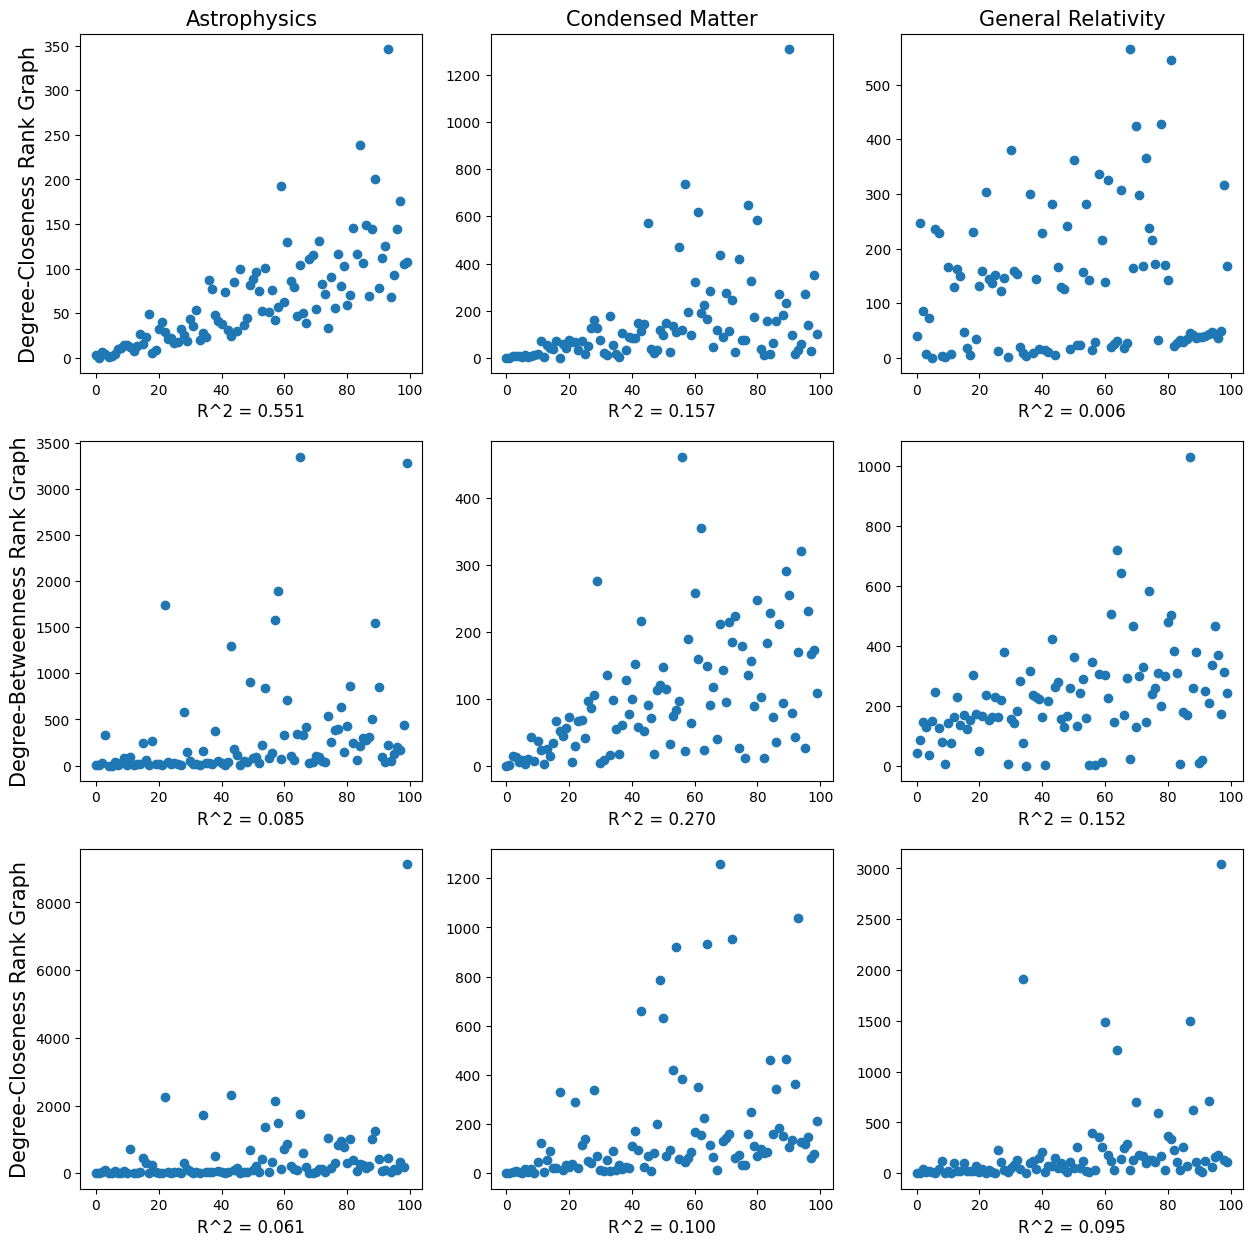

In [156]:
fig, axs = plt.subplots(3,3, figsize = (15,15))
for i in range(3):
    axs[0][i].scatter(np.arange(100), dc[i])
    axs[0][i].set_xlabel('R^2 = %.3f' % (np.corrcoef(np.arange(100), dc[i])[0,1] ** 2), fontsize = 12)
    axs[1][i].scatter(np.arange(100), db[i])
    axs[1][i].set_xlabel('R^2 = %.3f' % (np.corrcoef(np.arange(100), db[i])[0,1] ** 2), fontsize = 12)
    axs[2][i].scatter(np.arange(100), cb[i])
    axs[2][i].set_xlabel('R^2 = %.3f' % (np.corrcoef(np.arange(100), cb[i])[0,1] ** 2), fontsize = 12)
axs[0][0].set_ylabel('Degree-Closeness Rank Graph', fontsize = 15)
axs[1][0].set_ylabel('Degree-Betweenness Rank Graph', fontsize = 15)
axs[2][0].set_ylabel('Degree-Closeness Rank Graph', fontsize = 15)
axs[0][0].set_title('Astrophysics', fontsize = 15)
axs[0][1].set_title('Condensed Matter', fontsize = 15)
axs[0][2].set_title('General Relativity', fontsize = 15)
plt.show()